In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sbn
from tqdm import tqdm_notebook as tqdm
import warnings

warnings.filterwarnings('ignore')
sbn.set(style='white')

In [2]:
train_data = pd.read_csv('dataset/train.csv')

In [3]:
test_data = pd.read_csv('dataset/test.csv')

In [4]:
print(train_data.TRENDMODE.nunique())

92


In [5]:
report = pp.ProfileReport(train_data)
report.to_file('Report.html')

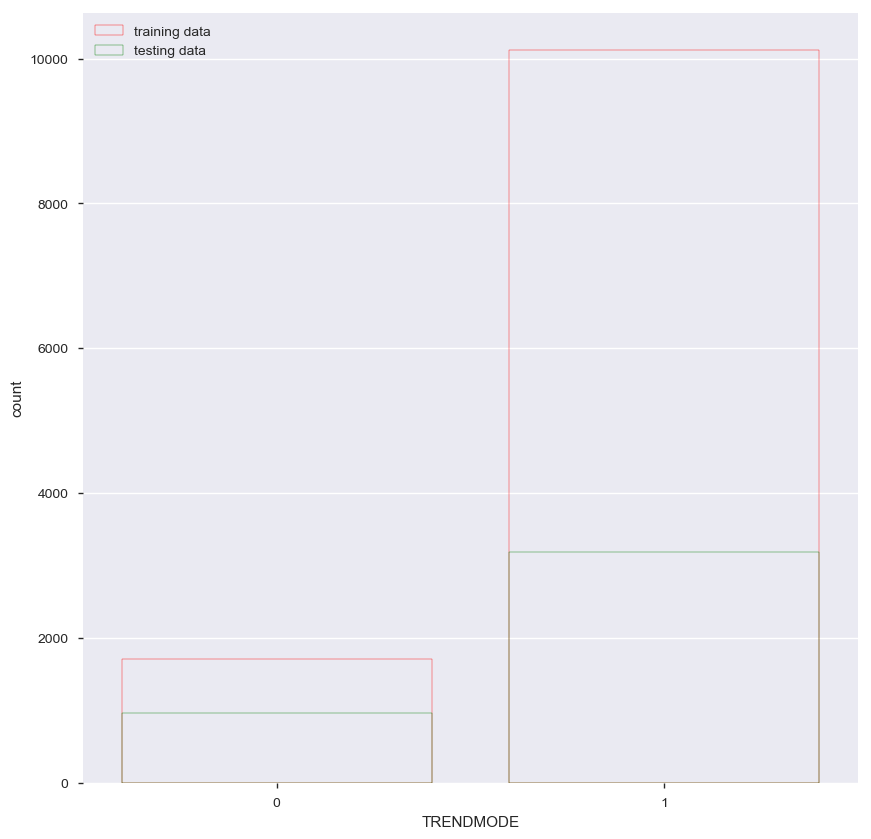

In [6]:
plt.figure(figsize=(10,10))
sbn.countplot(train_data['TRENDMODE'], edgecolor='red', label='training data', facecolor=(0,0,0,0))
sbn.countplot(test_data['TRENDMODE'], edgecolor='green', label='testing data', facecolor=(0,0,0,0))
plt.legend()

Trendmode pattern doesn't follow in test data>

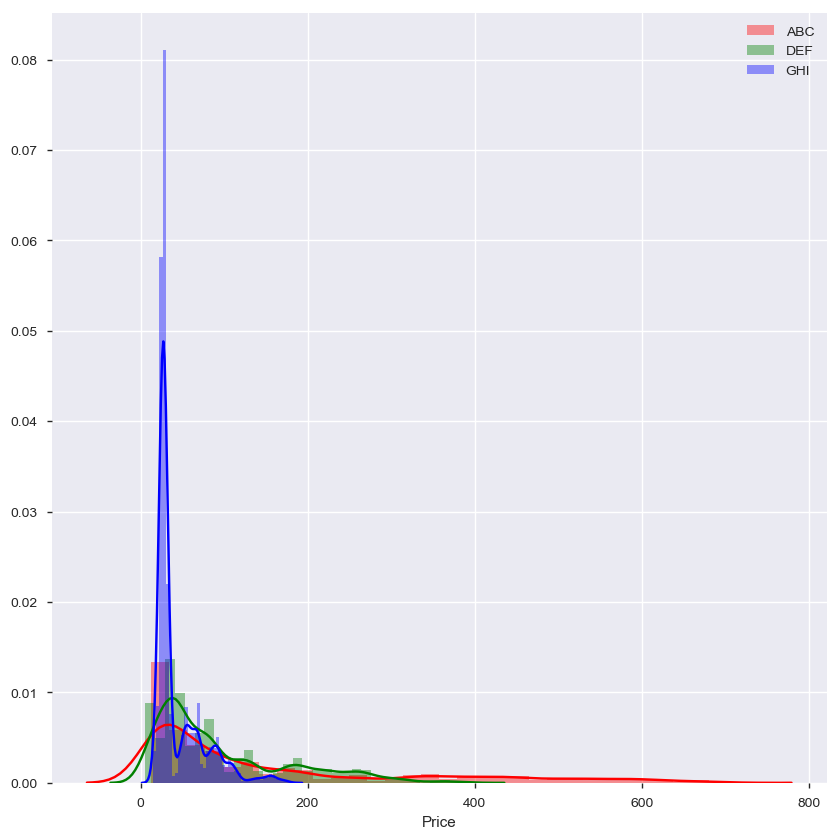

In [7]:
plt.figure(figsize=(10,10))
sbn.distplot(train_data.loc[train_data['Company ']=='ABC']['Price'], color='red', label='ABC')
sbn.distplot(train_data.loc[train_data['Company ']=='DEF']['Price'], color='green', label='DEF')
sbn.distplot(train_data.loc[train_data['Company ']=='GHI']['Price'], color='blue', label='GHI')
plt.legend()

Skewed Data.

In [8]:
print(train_data.columns)

Index(['ID', 'Date', 'Company ', 'SMA', 'EMA', 'WMA', 'DEMA', 'TEMA', 'TRIMA',
       'KAMA', 'FAMA', 'MAMA', 'T3', 'MACD', 'MACD_Hist', 'MACD_Signal', 'MAC',
       'MAC_Hist', 'MAC_Signal', 'SlowD', 'SlowK', 'FastD', 'FastK', 'RSI',
       'FatD', 'FatK', 'WILLR', 'ADX', 'ADXR', 'APO', 'PPO', 'MOM', 'BOP',
       'CCI', 'CMO', 'ROC', 'ROCR', 'Aroon Down', 'Aroon Up', 'AROONOSC',
       'MFI', 'TRIX', 'ULTOSC', 'DX', 'MINUS_DI', 'PLUS_DI', 'MINUS_DM',
       'PLUS_DM', 'Real Lower Band', 'Real Middle Band', 'Real Upper Band',
       'MIDPOINT', 'MIDPRICE', 'SAR', 'TRANGE', 'ATR', 'NATR', 'Chaikin A/D',
       'ADOSC', 'OBV', 'HT_TRENDLINE', 'LEAD SINE', 'SINE', 'TRENDMODE',
       'DCPERIOD', 'HT_DCPHASE', 'PHASE', 'QUADRATURE', 'Price'],
      dtype='object')


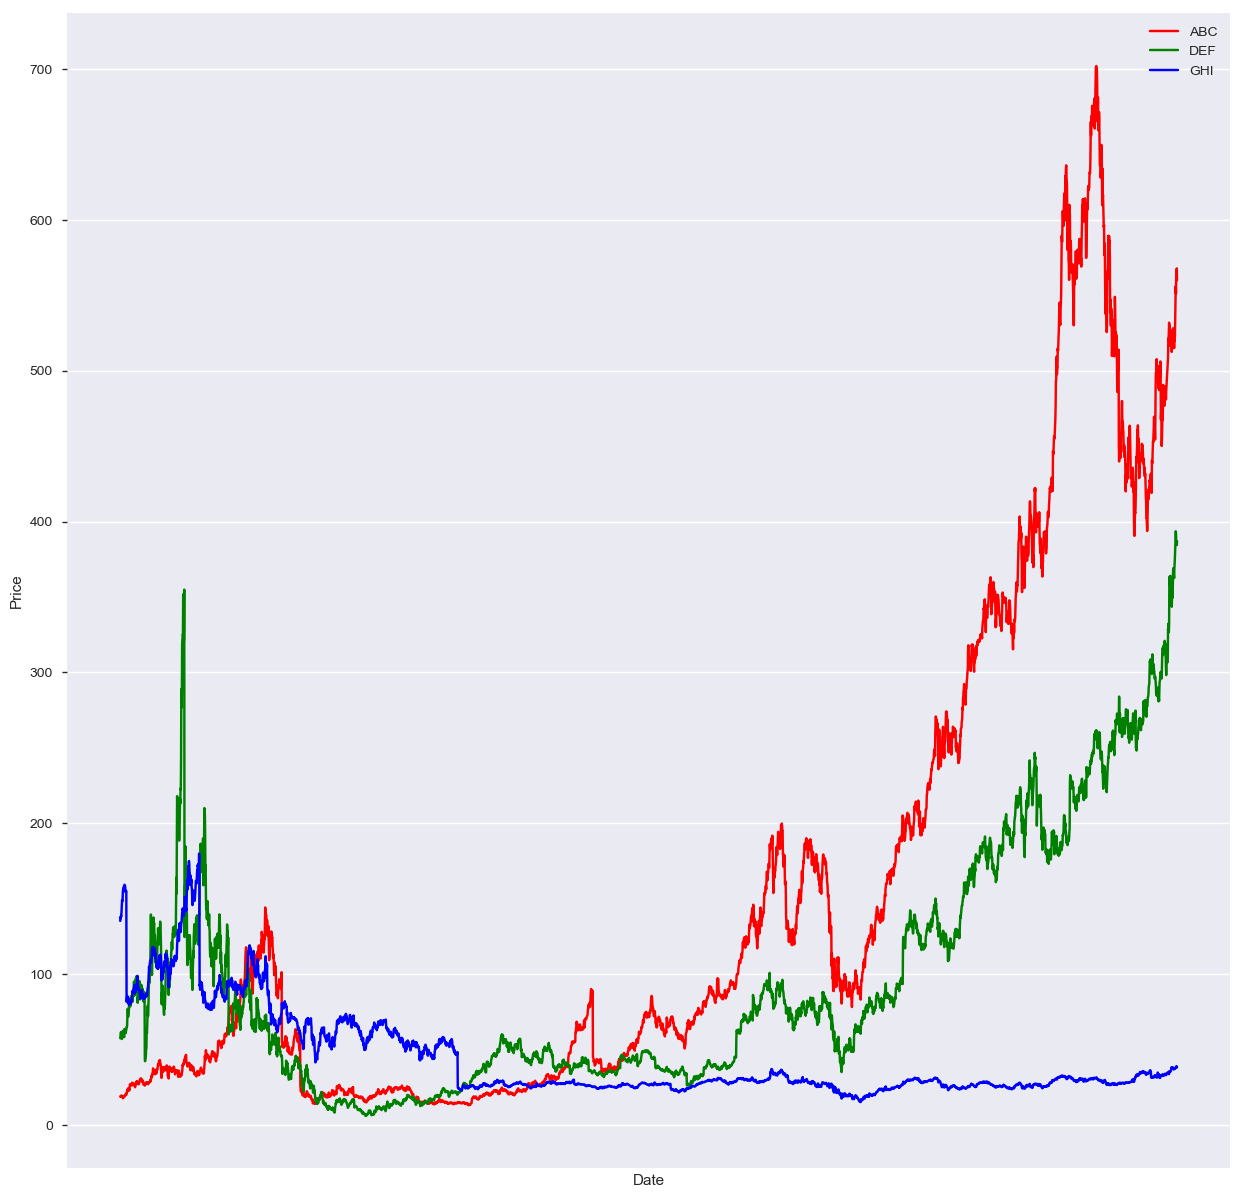

In [9]:
plt.figure(figsize=(15,15))
sbn.lineplot(x='Date', y='Price', data=train_data.loc[train_data['Company ']=='ABC'], label='ABC', color='red', sort=False)
sbn.lineplot(x='Date', y='Price', data=train_data.loc[train_data['Company ']=='DEF'], label='DEF', color='green', sort=False)
sbn.lineplot(x='Date', y='Price', data=train_data.loc[train_data['Company ']=='GHI'], label='GHI', color='blue', sort=False)
plt.legend()
plt.xticks([],[])
plt.show()

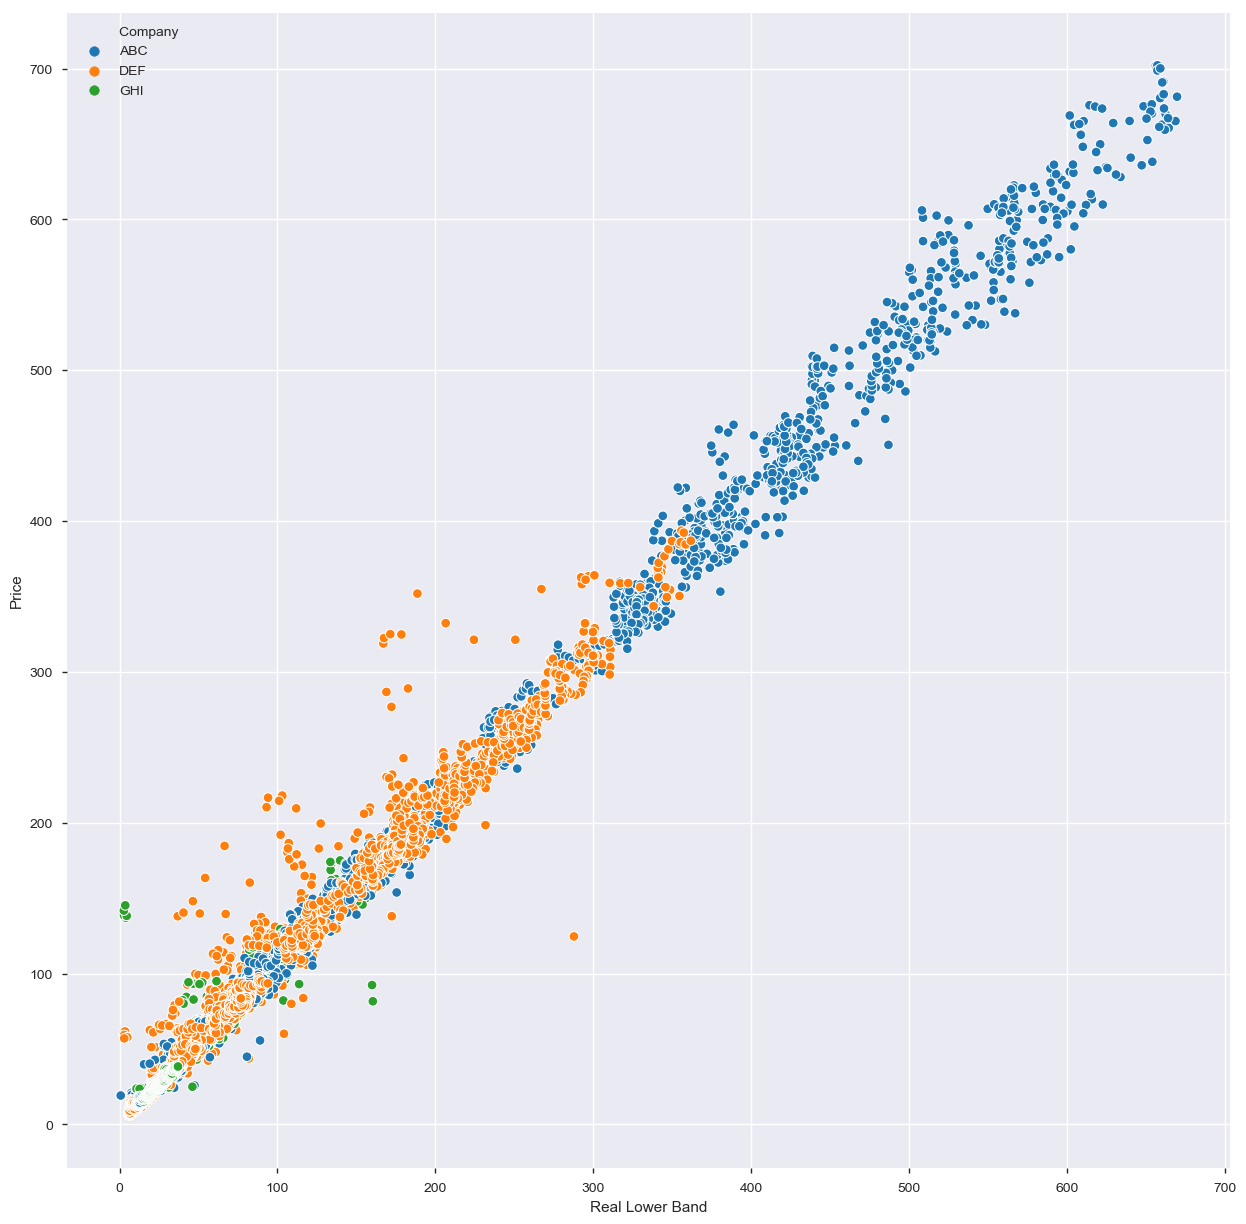

In [10]:
plt.figure(figsize=(15,15))
sbn.scatterplot(x='Real Lower Band', y='Price', data=train_data, hue='Company ')

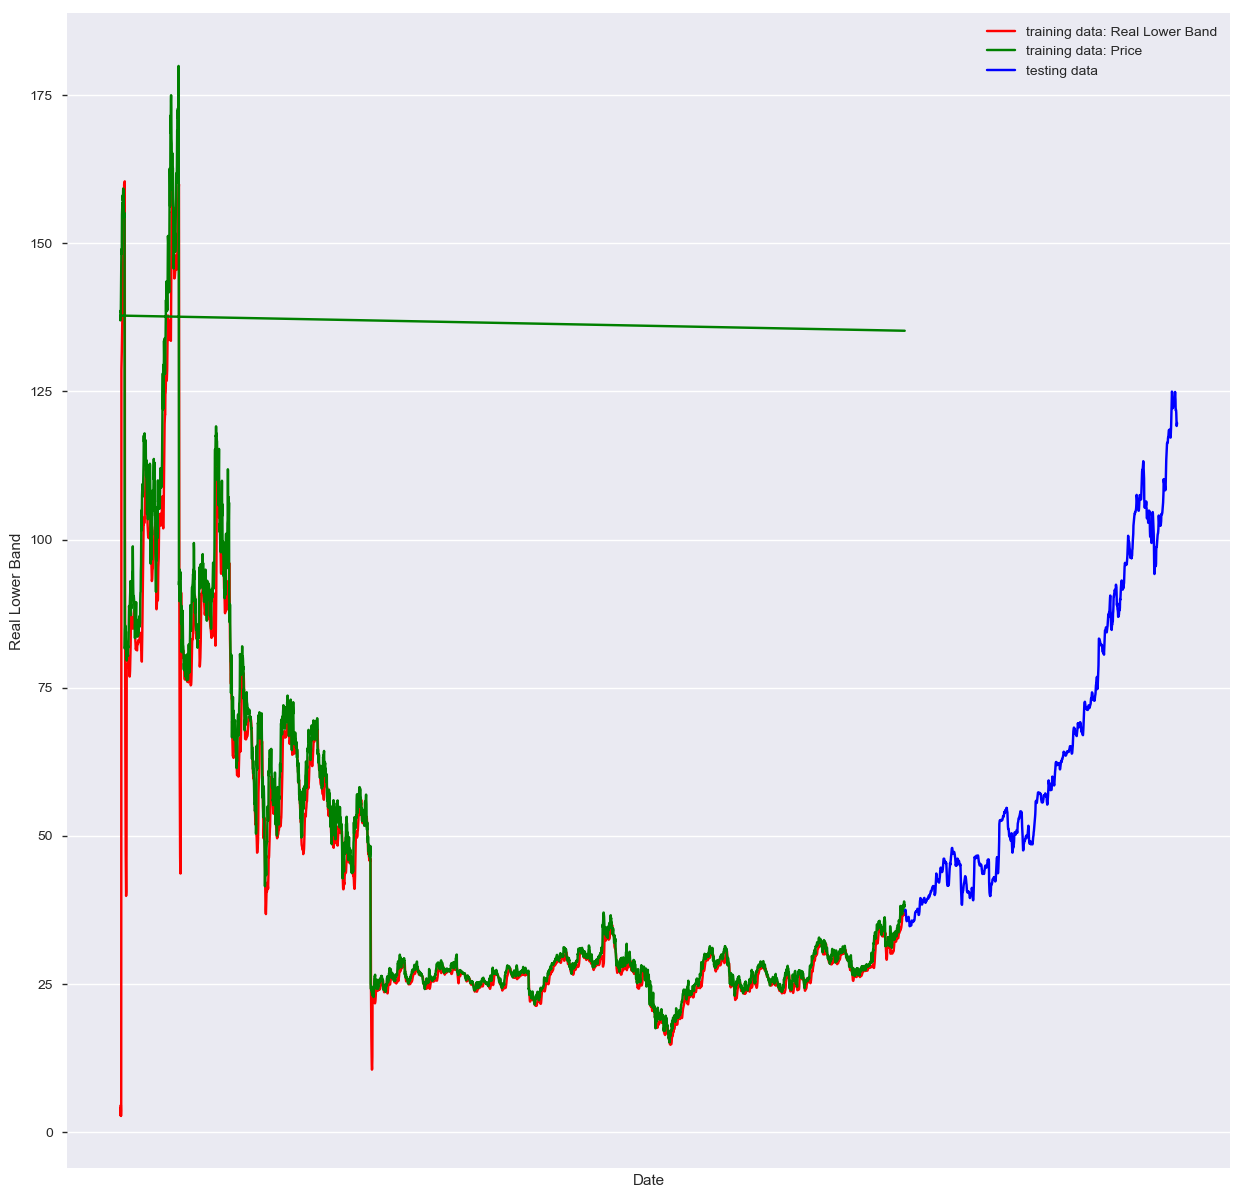

In [11]:
plt.figure(figsize=(15,15))
sbn.lineplot(x='Date', y='Real Lower Band', data=train_data.loc[train_data['Company ']=='GHI'], label='training data: Real Lower Band', color='red', sort=False)
sbn.lineplot(x='Date', y='Price', data=train_data.loc[train_data['Company ']=='GHI'], label='training data: Price', color='green', sort=False)
sbn.lineplot(x='Date', y='Real Lower Band', data=test_data.loc[test_data['Company ']=='GHI'], label='testing data', color='blue', sort=False)
plt.legend()
plt.xticks([],[])
plt.show()

In [12]:
data = train_data.loc[train_data['Company ']=='GHI']
data.head()

,ID,Date,Company,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,...,OBV,HT_TRENDLINE,LEAD SINE,SINE,TRENDMODE,DCPERIOD,HT_DCPHASE,PHASE,QUADRATURE,Price
2,3,15-01-2148,GHI,129.583,129.5830,129.5585,NaN,NaN,129.1990,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.25
5,6,16-01-2148,GHI,129.858,130.0915,130.0671,NaN,NaN,129.1947,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.81
8,9,20-01-2148,GHI,130.146,130.8258,130.8438,NaN,NaN,129.4930,130.4179,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.00
11,12,21-01-2148,GHI,130.896,131.9938,132.1355,NaN,NaN,130.2707,130.4914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.63
14,15,22-01-2148,GHI,131.464,132.6422,132.9835,NaN,NaN,131.1710,130.9130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.25


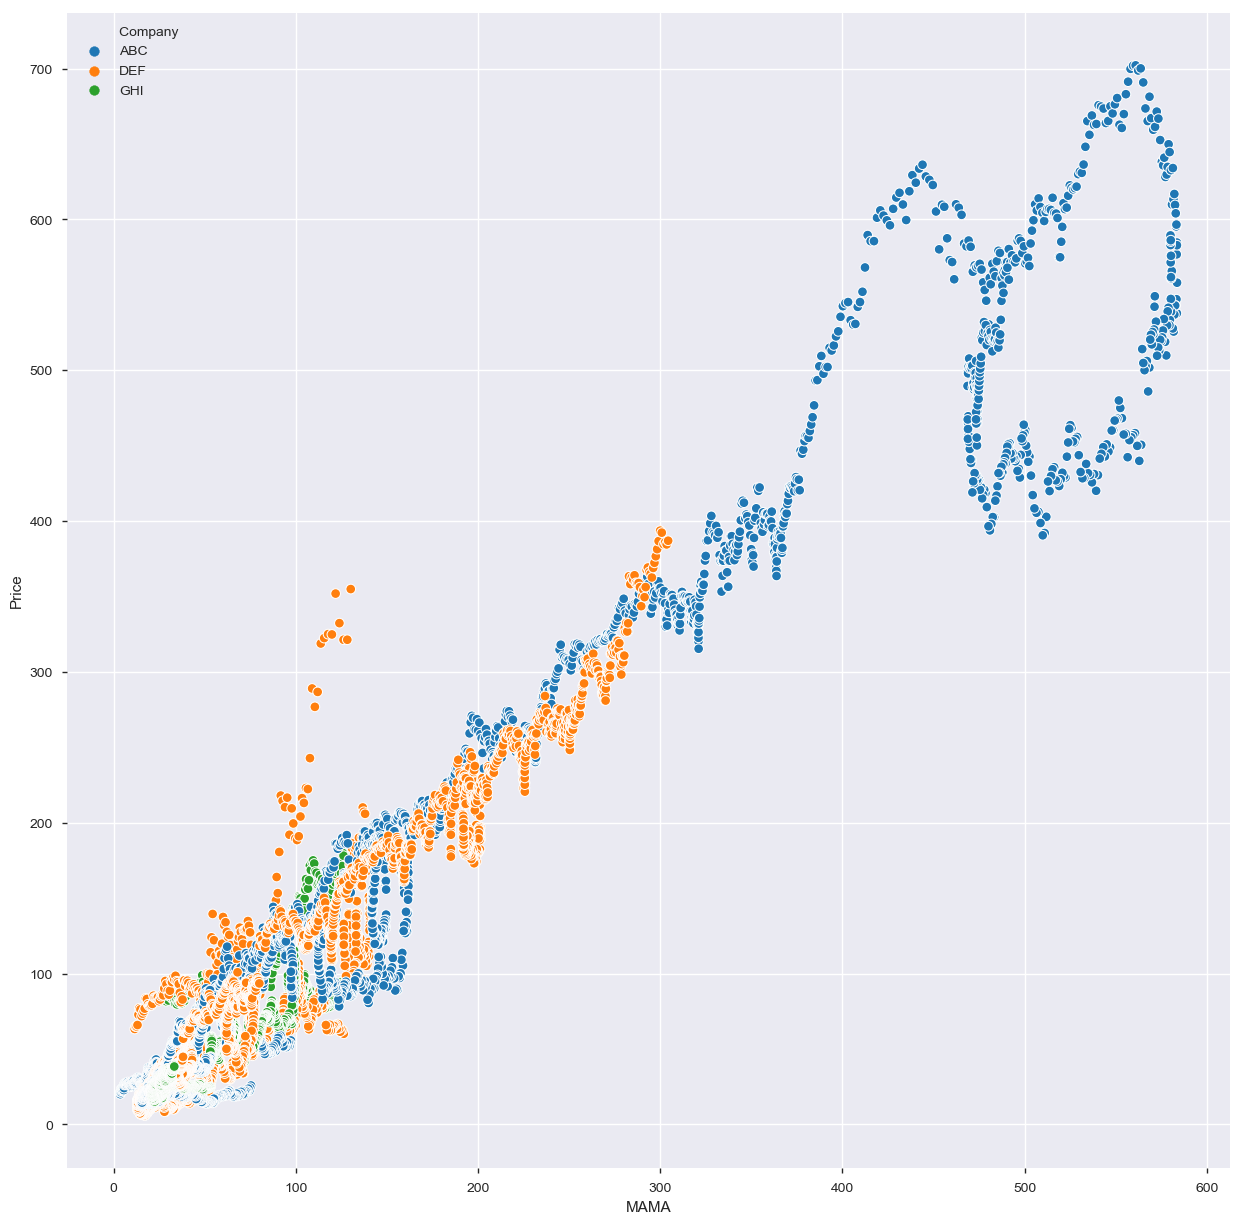

In [13]:
plt.figure(figsize=(15,15))
sbn.scatterplot(x='MAMA', y='Price', data=train_data, hue='Company ')

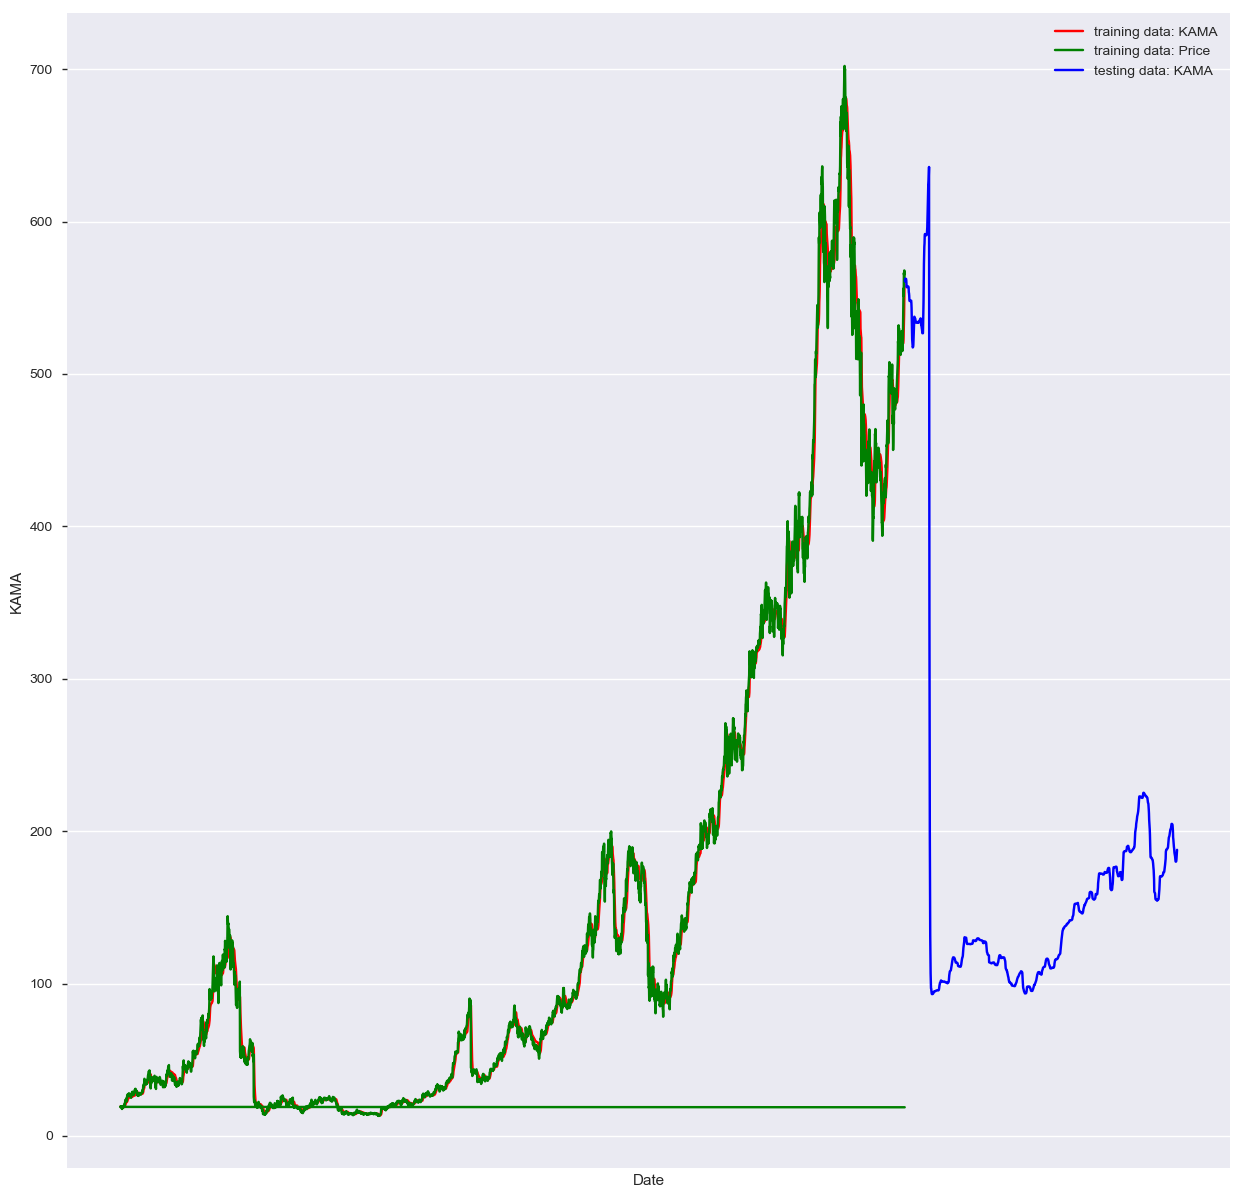

In [14]:
plt.figure(figsize=(15,15))
sbn.lineplot(x='Date', y='KAMA', data=train_data.loc[train_data['Company ']=='ABC'], label='training data: KAMA', color='red', sort=False)
sbn.lineplot(x='Date', y='Price', data=train_data.loc[train_data['Company ']=='ABC'], label='training data: Price', color='green', sort=False)
sbn.lineplot(x='Date', y='KAMA', data=test_data.loc[test_data['Company ']=='ABC'], label='testing data: KAMA', color='blue', sort=False)
plt.legend()
plt.xticks([],[])
plt.show()

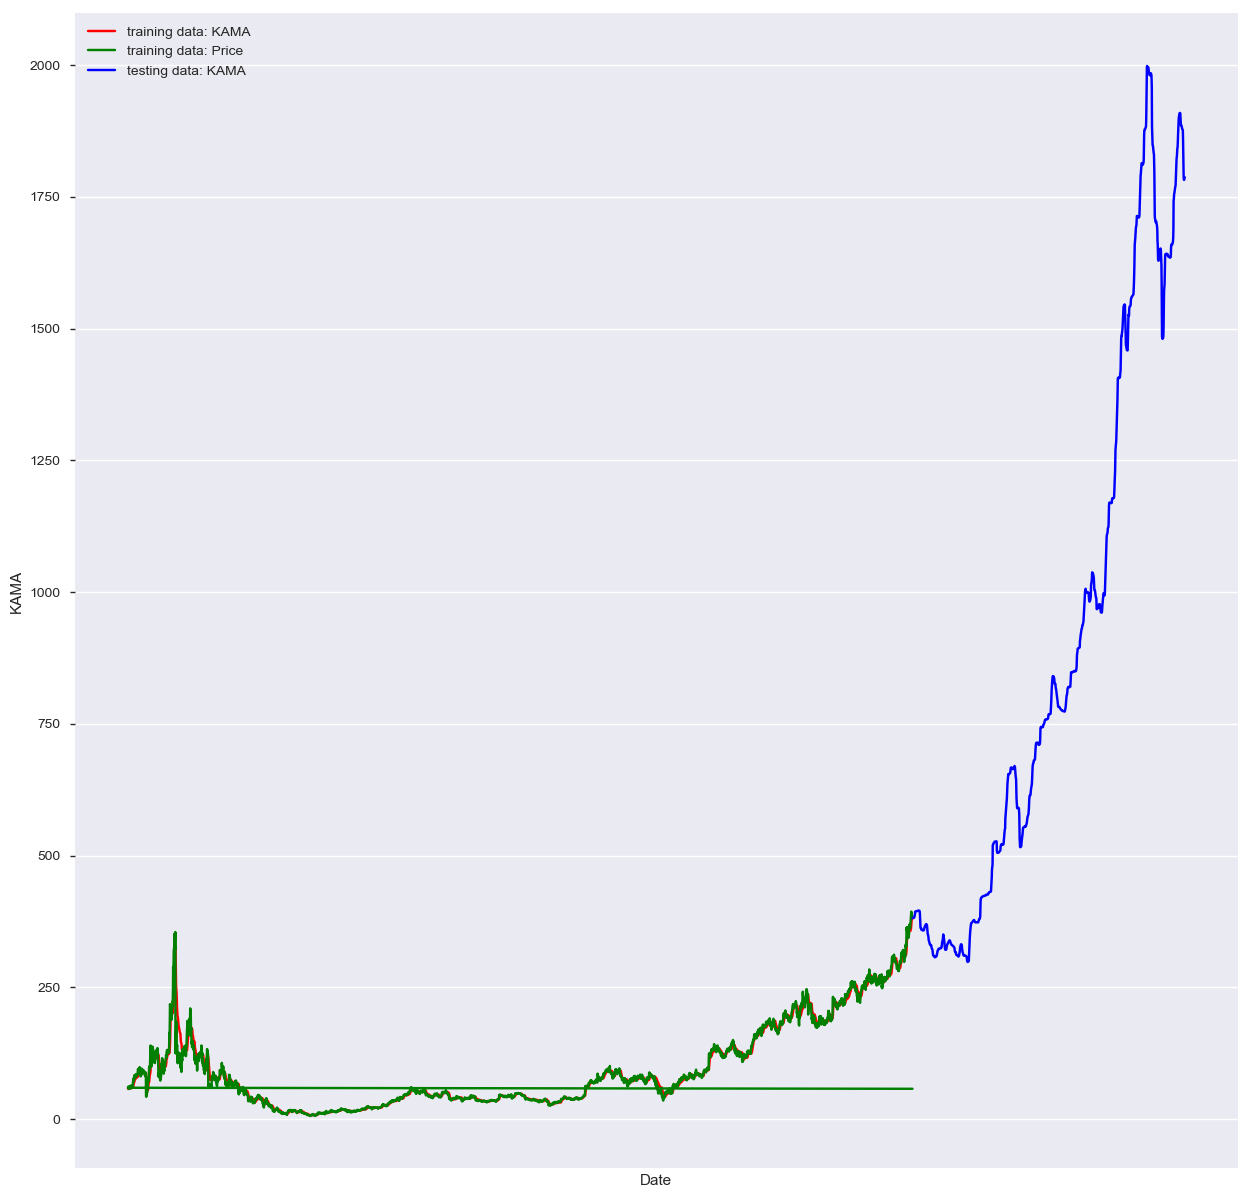

In [15]:
plt.figure(figsize=(15,15))
sbn.lineplot(x='Date', y='KAMA', data=train_data.loc[train_data['Company ']=='DEF'], label='training data: KAMA', color='red', sort=False)
sbn.lineplot(x='Date', y='Price', data=train_data.loc[train_data['Company ']=='DEF'], label='training data: Price', color='green', sort=False)
sbn.lineplot(x='Date', y='KAMA', data=test_data.loc[test_data['Company ']=='DEF'], label='testing data: KAMA', color='blue', sort=False)
plt.legend()
plt.xticks([],[])
plt.show()

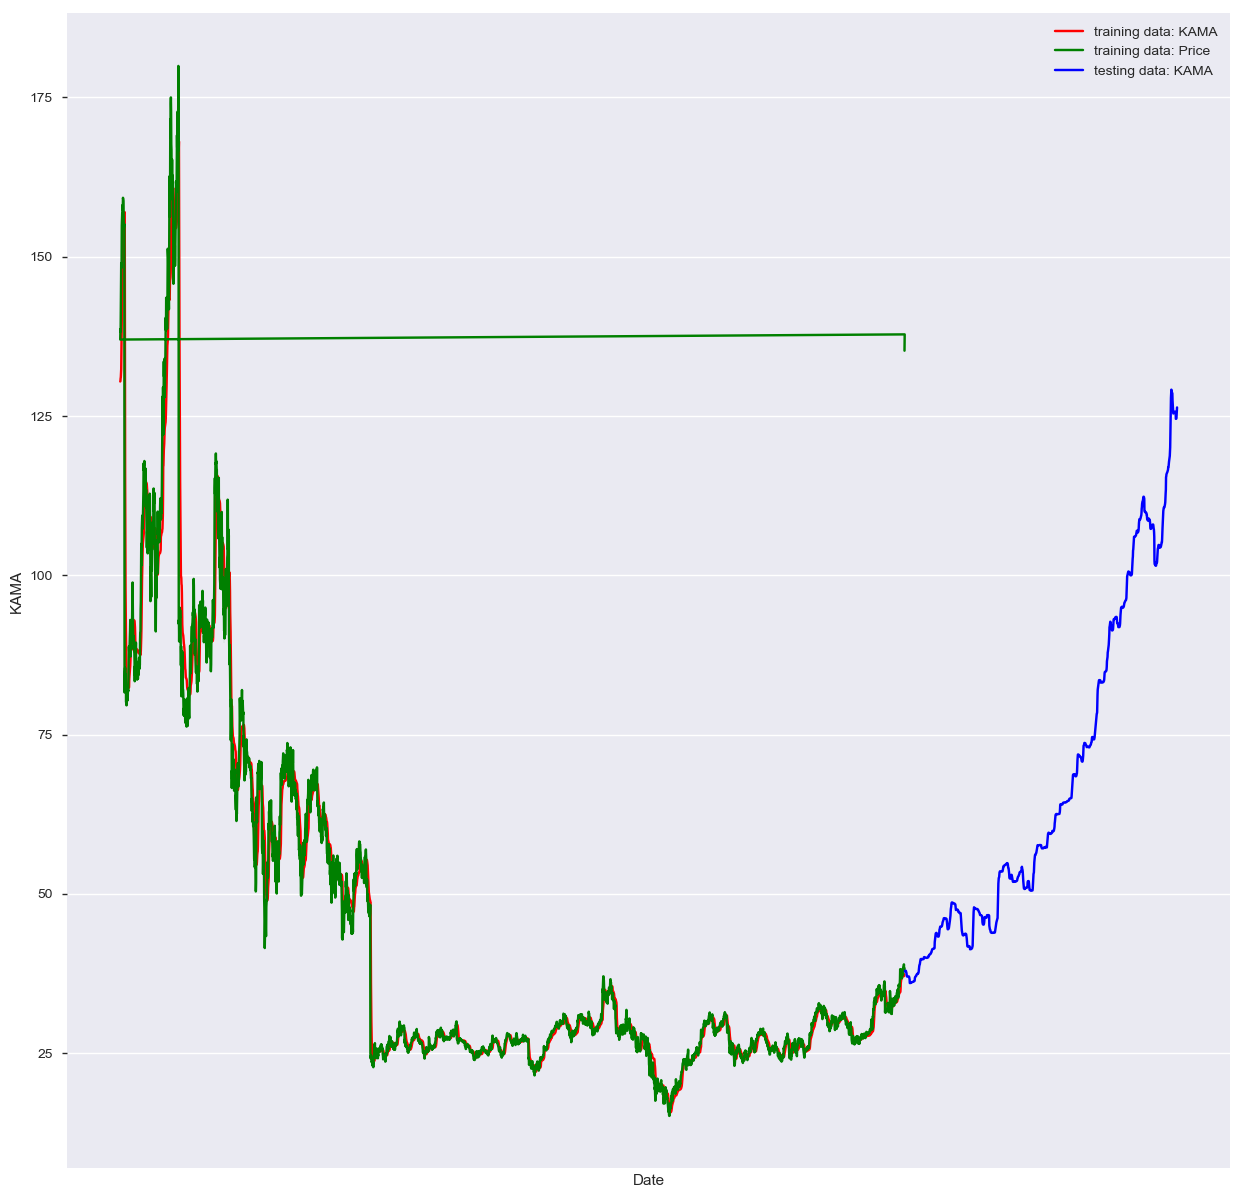

In [16]:
plt.figure(figsize=(15,15))
sbn.lineplot(x='Date', y='KAMA', data=train_data.loc[train_data['Company ']=='GHI'], label='training data: KAMA', color='red', sort=False)
sbn.lineplot(x='Date', y='Price', data=train_data.loc[train_data['Company ']=='GHI'], label='training data: Price', color='green', sort=False)
sbn.lineplot(x='Date', y='KAMA', data=test_data.loc[test_data['Company ']=='GHI'], label='testing data: KAMA', color='blue', sort=False)
plt.legend()
plt.xticks([],[])
plt.show()

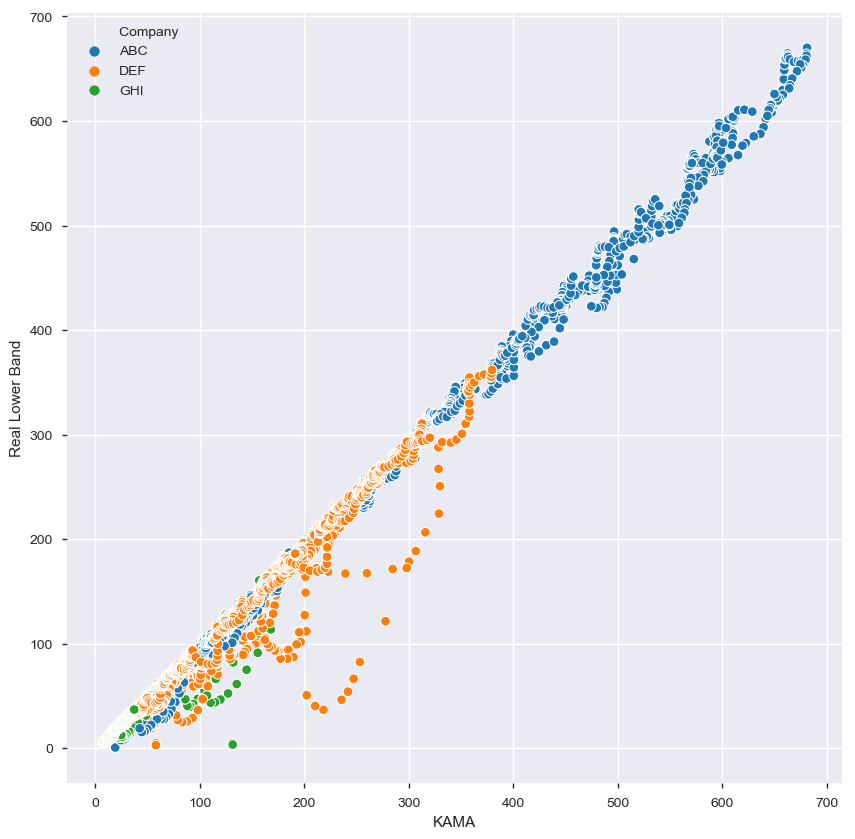

In [17]:
plt.figure(figsize=(10,10))
sbn.scatterplot(x='KAMA', y='Real Lower Band', data=train_data, hue='Company ')

In [18]:
print(train_data['Price'].corr(train_data['Real Lower Band']))

0.9959848495987436


In [19]:
print(train_data['Price'].corr(train_data['KAMA']))

0.9971887009260452


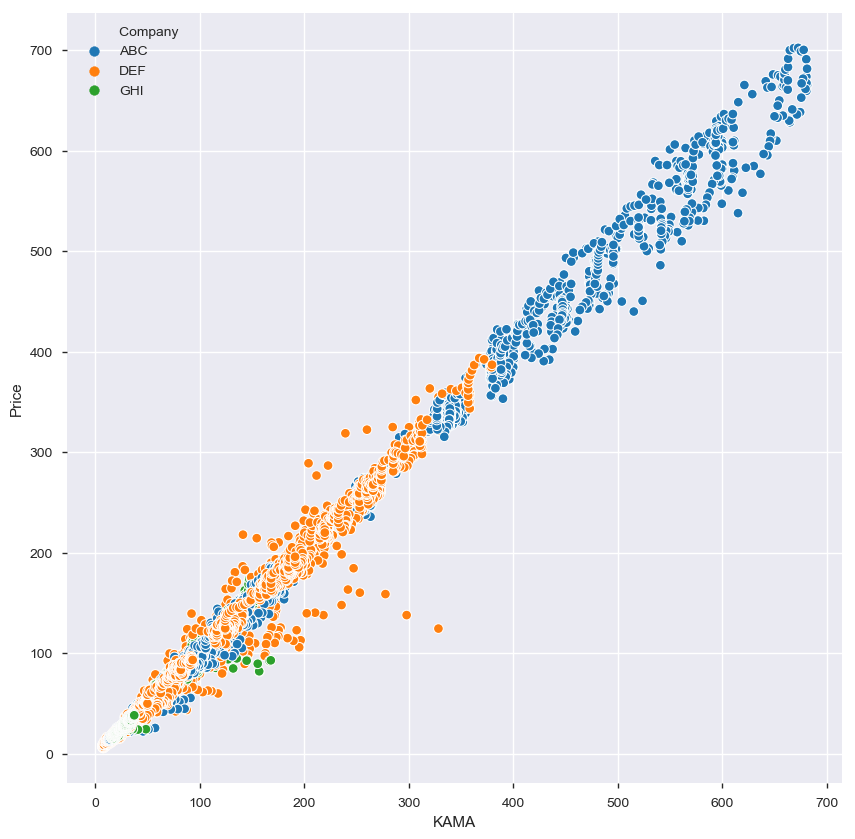

In [20]:
plt.figure(figsize=(10,10))
sbn.scatterplot(x='KAMA', y='Price', data=train_data, hue='Company ')

In [21]:
train_data['KAMA_diff'] = np.abs(np.array(train_data['Price'])-np.array(train_data['KAMA']))

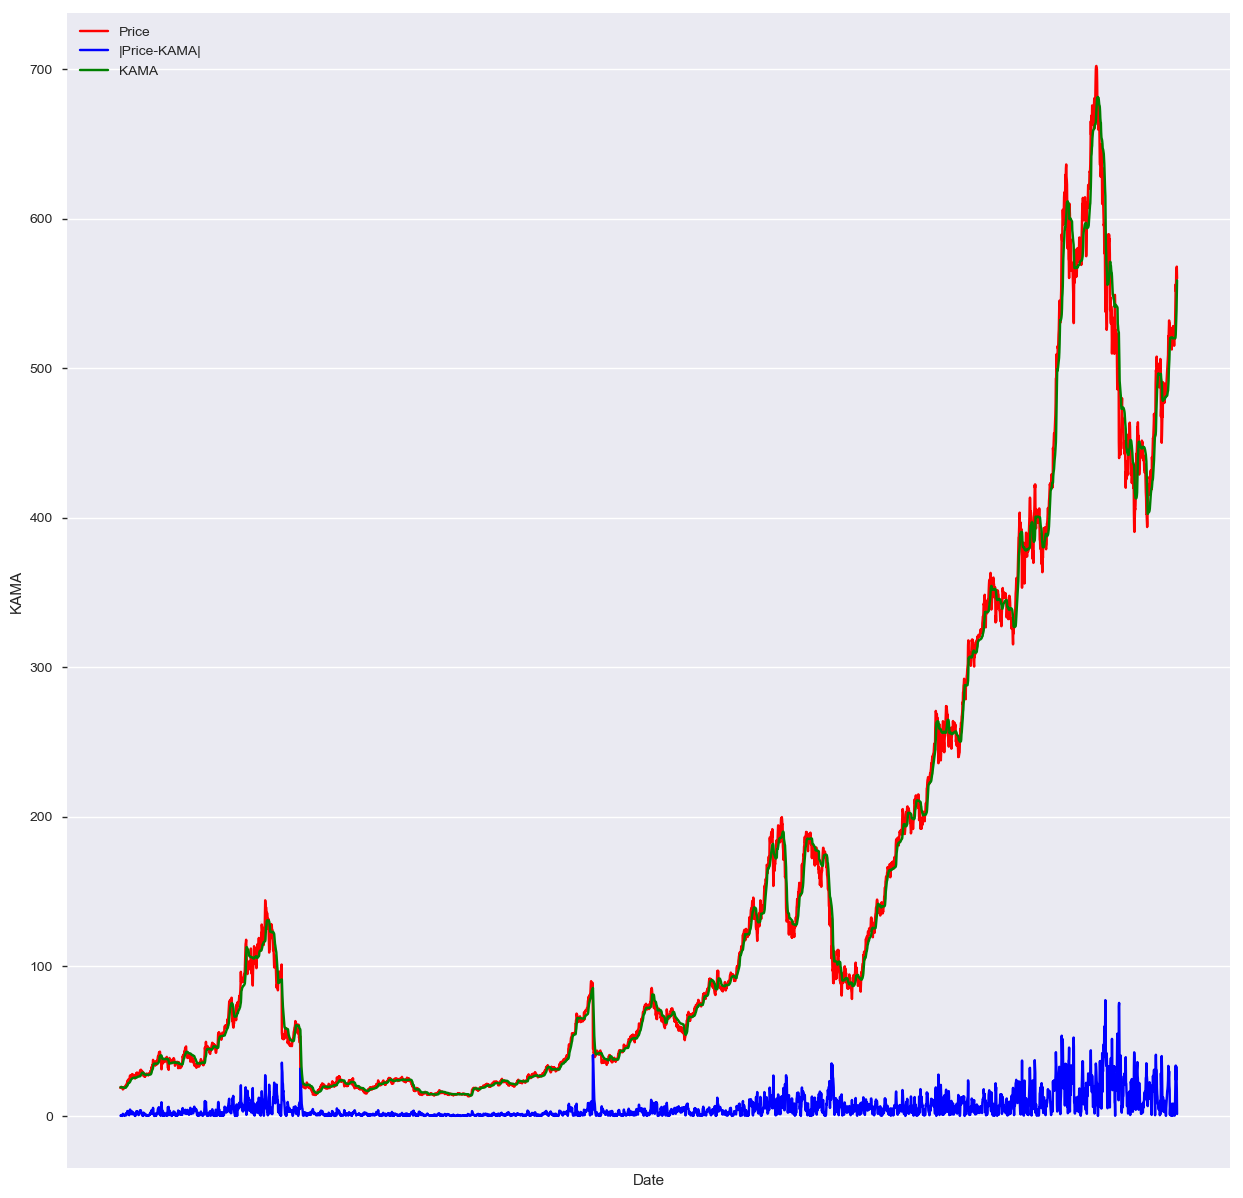

In [22]:
plt.figure(figsize=(15,15))
sbn.lineplot(x='Date', y='Price', data=train_data.loc[train_data['Company ']=='ABC'], sort=False, color='red', label='Price')
sbn.lineplot(x='Date', y='KAMA_diff', data=train_data.loc[train_data['Company ']=='ABC'], sort=False, color='blue', label='|Price-KAMA|')
sbn.lineplot(x='Date', y='KAMA', data=train_data.loc[train_data['Company ']=='ABC'], sort=False, color='green', label='KAMA')
plt.legend()
plt.xticks([],[])
plt.show()

In [23]:
train_data.head()

,ID,Date,Company,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,...,HT_TRENDLINE,LEAD SINE,SINE,TRENDMODE,DCPERIOD,HT_DCPHASE,PHASE,QUADRATURE,Price,KAMA_diff
0,1,15-01-2148,ABC,17.556,17.5560,18.3160,NaN,NaN,17.7347,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.81,NaN
1,2,15-01-2148,DEF,56.090,56.0900,55.2956,NaN,NaN,55.5317,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.50,NaN
2,3,15-01-2148,GHI,129.583,129.5830,129.5585,NaN,NaN,129.1990,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.25,NaN
3,4,16-01-2148,ABC,18.137,17.8985,18.6585,NaN,NaN,18.1427,19.2201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.06,0.1601
4,5,16-01-2148,DEF,56.040,56.7100,55.9156,NaN,NaN,55.0523,57.5121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.44,1.9279


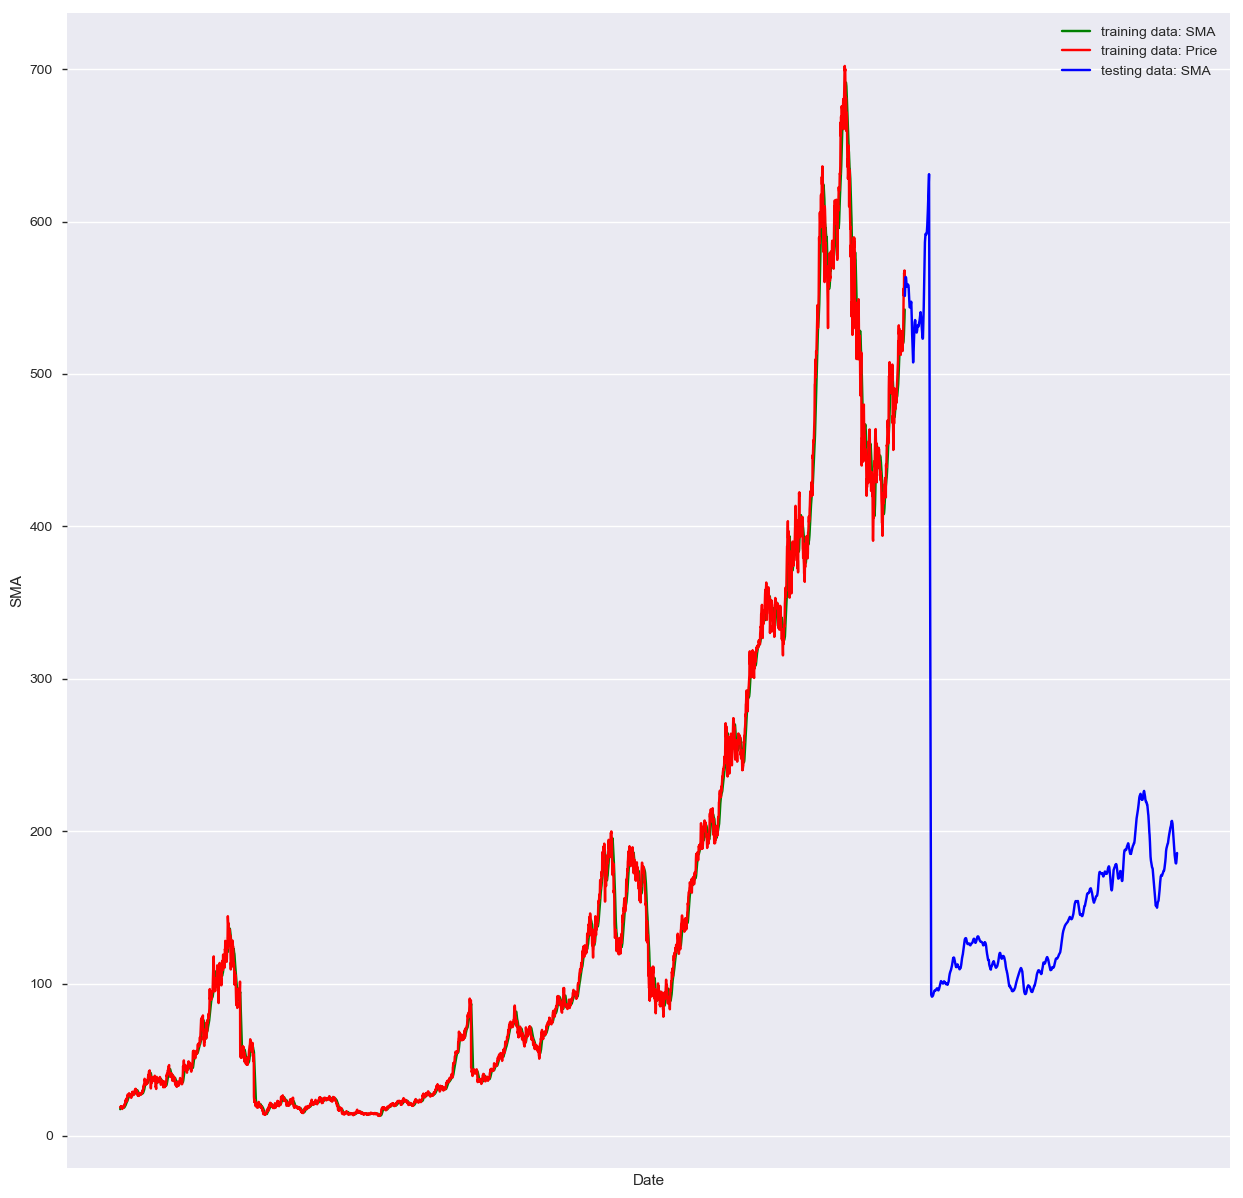

In [24]:
plt.figure(figsize=(15,15))
sbn.lineplot(x='Date', y='SMA', data=train_data.loc[train_data['Company ']=='ABC'], label='training data: SMA', color='green', sort=False)
sbn.lineplot(x='Date', y='Price', data=train_data.loc[train_data['Company ']=='ABC'], label='training data: Price', color='red', sort=False)
sbn.lineplot(x='Date', y='SMA', data=test_data.loc[test_data['Company ']=='ABC'], label='testing data: SMA', color='blue', sort=False)
plt.legend()
plt.xticks([],[])
plt.show()

In [25]:
train_data['Price'].corr(train_data['SMA'])

0.9974627120628136

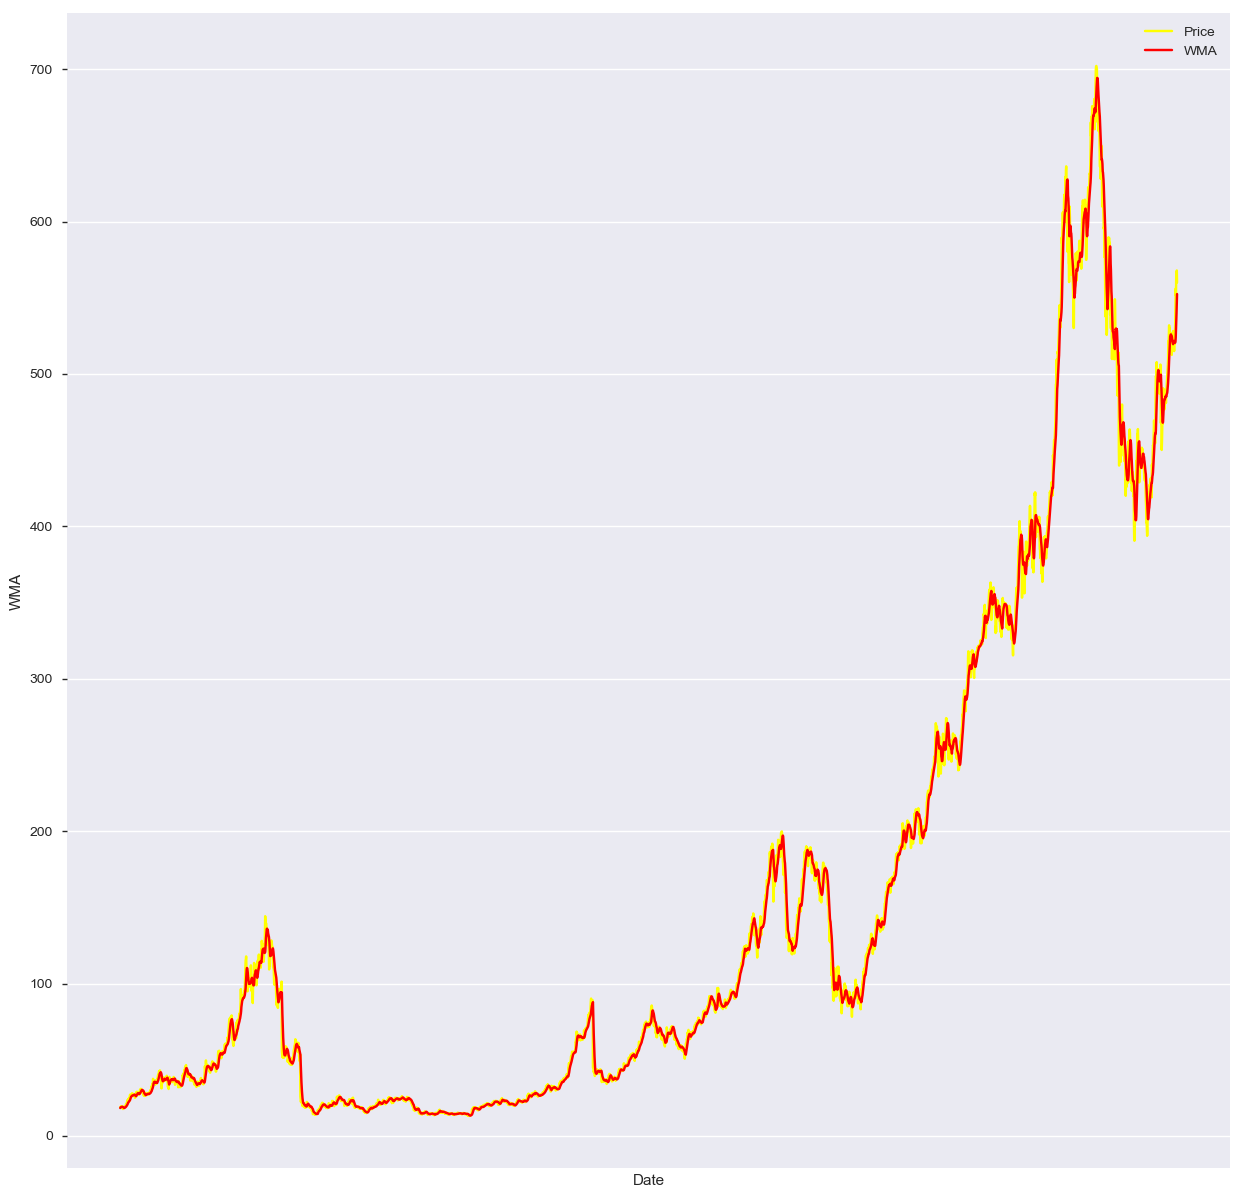

In [26]:
df = train_data.loc[train_data['Company ']=='ABC']
plt.figure(figsize=(15,15))
sbn.lineplot(x='Date', y='Price', data=df, color='yellow', label='Price', sort=False)
sbn.lineplot(x='Date', y='WMA', data=df, color='red', label='WMA', sort=False)
plt.legend()
plt.xticks([],[])
plt.show()

In [27]:
train_data.head()

,ID,Date,Company,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,...,HT_TRENDLINE,LEAD SINE,SINE,TRENDMODE,DCPERIOD,HT_DCPHASE,PHASE,QUADRATURE,Price,KAMA_diff
0,1,15-01-2148,ABC,17.556,17.5560,18.3160,NaN,NaN,17.7347,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.81,NaN
1,2,15-01-2148,DEF,56.090,56.0900,55.2956,NaN,NaN,55.5317,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.50,NaN
2,3,15-01-2148,GHI,129.583,129.5830,129.5585,NaN,NaN,129.1990,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.25,NaN
3,4,16-01-2148,ABC,18.137,17.8985,18.6585,NaN,NaN,18.1427,19.2201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.06,0.1601
4,5,16-01-2148,DEF,56.040,56.7100,55.9156,NaN,NaN,55.0523,57.5121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.44,1.9279


In [28]:
df_abc = train_data.loc[train_data['Company ']=="ABC"]

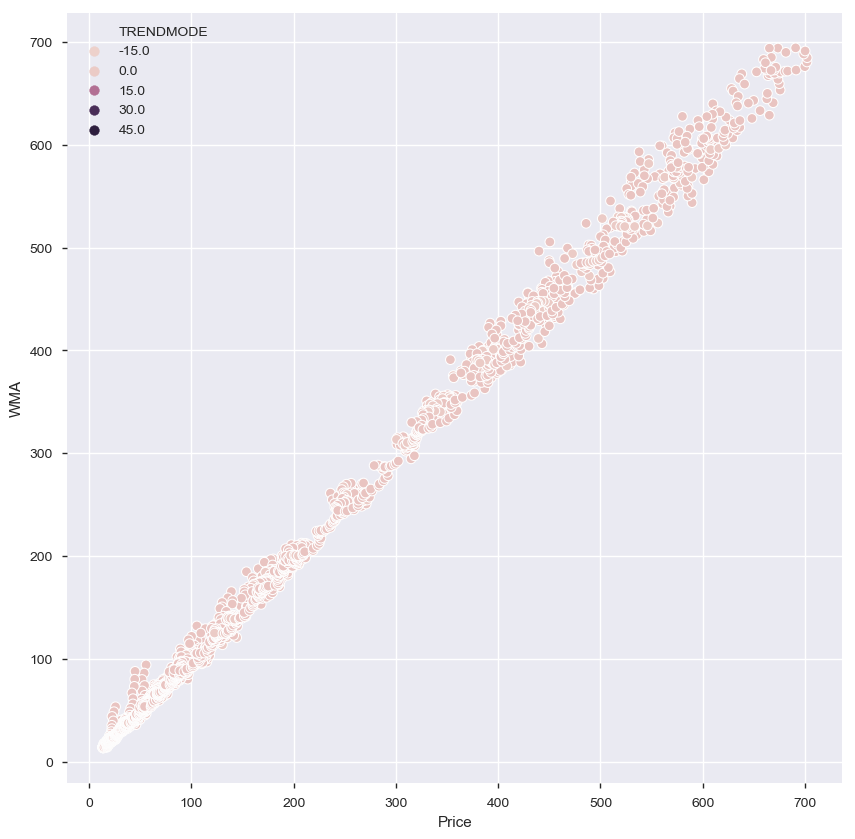

In [29]:
df_abc.TRENDMODE = df_abc.TRENDMODE.fillna(-1)

plt.figure(figsize=(10,10))
sbn.scatterplot(x='Price', y='WMA', hue='TRENDMODE', data=df_abc)

In [30]:
df_abc.head()

,ID,Date,Company,SMA,EMA,WMA,DEMA,TEMA,TRIMA,KAMA,...,HT_TRENDLINE,LEAD SINE,SINE,TRENDMODE,DCPERIOD,HT_DCPHASE,PHASE,QUADRATURE,Price,KAMA_diff
0,1,15-01-2148,ABC,17.556,17.5560,18.3160,NaN,NaN,17.7347,NaN,...,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,18.81,NaN
3,4,16-01-2148,ABC,18.137,17.8985,18.6585,NaN,NaN,18.1427,19.2201,...,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,19.06,0.1601
6,7,20-01-2148,ABC,18.393,18.1097,18.8264,NaN,NaN,18.4550,19.2123,...,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,18.91,0.3023
9,10,21-01-2148,ABC,18.674,18.2261,18.8913,NaN,NaN,18.7403,19.1857,...,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,19.25,0.0643
12,13,22-01-2148,ABC,18.662,18.3105,18.8942,NaN,NaN,18.8970,19.1829,...,NaN,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,19.50,0.3171


In [31]:
df_abc.TRENDMODE.nunique()

33

In [32]:
df_abc.TRENDMODE.value_counts()

 1.0000     3419
 0.0000      526
-1.0000       24
 28.2250       1
 16.8672       1
 31.7494       1
 29.2899       1
 30.0885       1
 32.5395       1
 26.4921       1
 28.2200       1
 32.4756       1
 27.3849       1
 25.6205       1
 28.8630       1
 30.9452       1
 31.3856       1
 25.7939       1
 30.0017       1
 30.8053       1
 29.9656       1
 31.1204       1
 33.7027       1
 20.2969       1
 30.4632       1
 21.8169       1
 33.1992       1
 18.0609       1
 33.7263       1
 23.6570       1
 19.1434       1
 31.4338       1
 33.3387       1
Name: TRENDMODE, dtype: int64

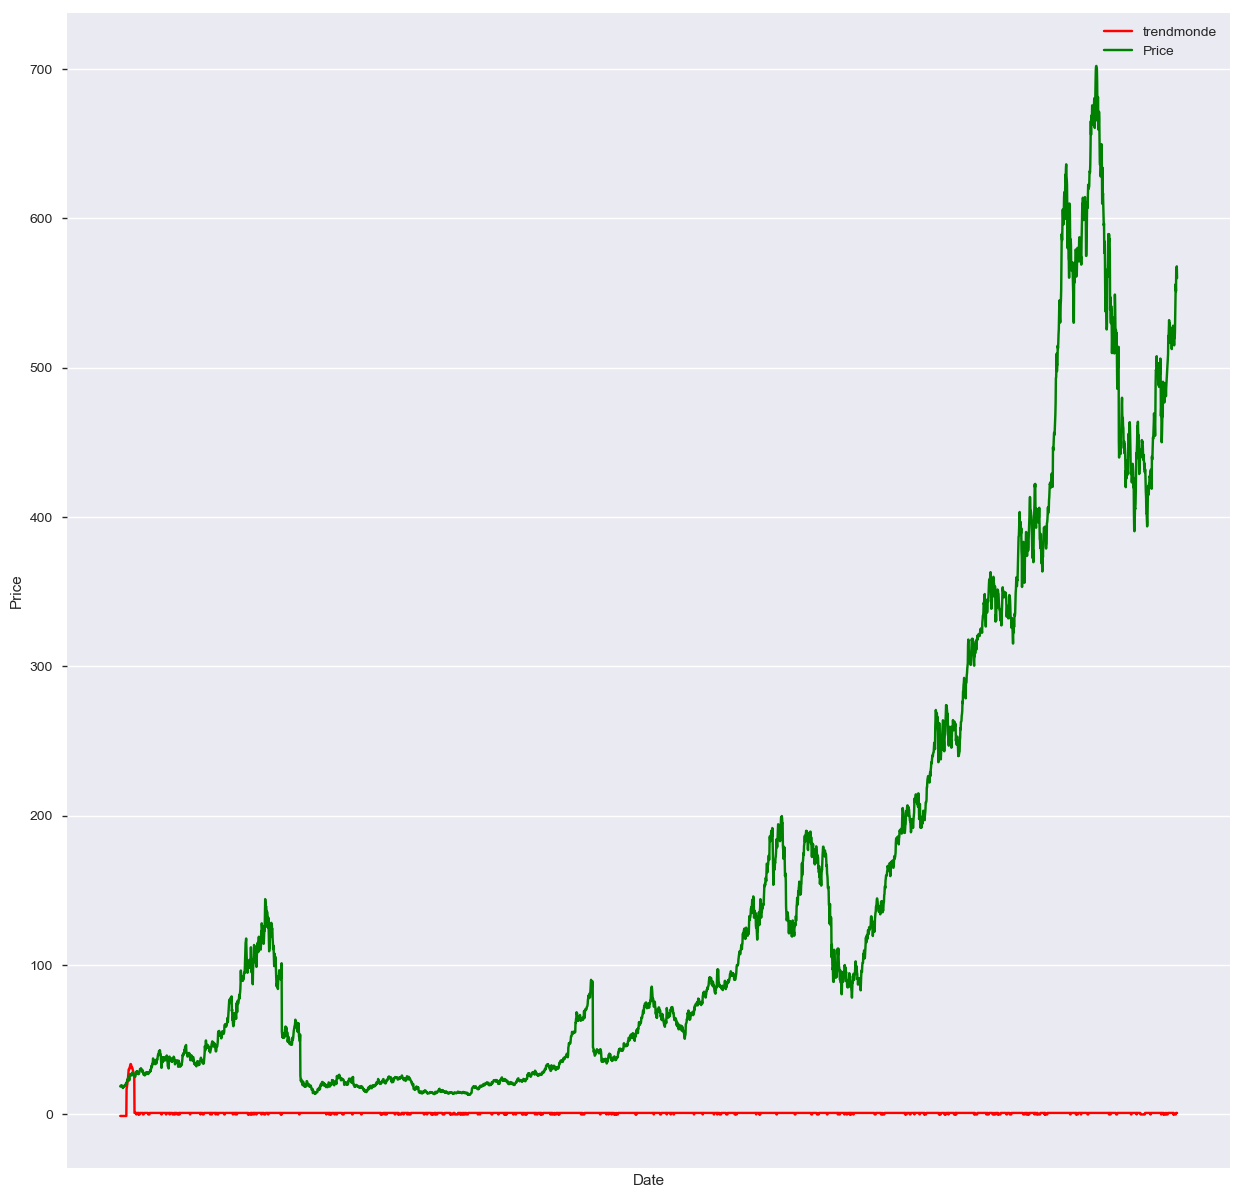

In [33]:
plt.figure(figsize=(15,15))
sbn.lineplot(x='Date', y='TRENDMODE', data=df_abc, label='trendmonde', color='red', sort=False)
sbn.lineplot(x='Date', y='Price', data=df_abc, label='Price', color='green', sort=False)
plt.xticks([],[])
plt.legend()
plt.show()

In [34]:
df = pd.DataFrame({'Price': df_abc['Price'], 'SMA': df_abc['SMA'], 'Trendmode': df_abc['TRENDMODE']})
df.head(100)

,Price,SMA,Trendmode
0,18.81,17.556,-1.0000
3,19.06,18.137,-1.0000
6,18.91,18.393,-1.0000
9,19.25,18.674,-1.0000
12,19.50,18.662,-1.0000
15,19.44,18.855,-1.0000
18,19.12,18.987,-1.0000
21,19.19,19.162,-1.0000
24,18.50,19.219,-1.0000
27,18.31,19.126,-1.0000


Can't find anything from trendmode. Why is it even there at the first place?